In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
c:\Users\nguye\Desktop\Crystal-Plasticity-COE-Course\notebooks
Moving up to the parent directory
c:\Users\nguye\Desktop\Crystal-Plasticity-COE-Course


In [24]:
###################################
# Preprocessing nonlinear loading #
###################################

def preprocessNonlinear(trueStrain, trueStress, strainPathX, strainPathY, strainPathZ):
    strainPathXprocess = strainPathX.copy()
    strainPathYprocess = strainPathY.copy()
    strainPathZprocess = strainPathZ.copy()
    turningIndices = turningStressPoints(trueStress)
    #print(turningIndices)
    #unloadingIndex = turningIndices[0]
    reloadingIndex = turningIndices[1]
    for i in range(reloadingIndex, trueStrain.size):
        strainPathXprocess[i] -= strainPathX[reloadingIndex]
        strainPathYprocess[i] -= strainPathY[reloadingIndex]
        strainPathZprocess[i] -= strainPathZ[reloadingIndex]
    # Equivalent Von Mises strain formula
    strainReloading = (2/3 * (strainPathXprocess ** 2 + strainPathYprocess ** 2 + strainPathZprocess ** 2)) ** (1/2) + trueStrain[reloadingIndex]
    actualStrain = trueStrain.copy()
    for i in range(reloadingIndex, trueStrain.size):
        actualStrain[i] = strainReloading[i]
    return {"strain": actualStrain, "stress": trueStress}

def turningStressPoints(trueStress):
    differences = np.diff(trueStress)
    index = 1
    turningIndices = []
    while index < differences.size:
        if (differences[index - 1] <= 0 and differences[index] >= 0) or (differences[index - 1] >= 0 and differences[index] <= 0):
            turningIndices.append(index)
        index += 1
    return turningIndices

def preprocessDAMASKNonlinear(path, excel=False):
    if not excel:
        df = pd.read_csv(path, skiprows = 6, delimiter = "\t")
    else:
        df = pd.read_excel(path, usecols=["Mises(Cauchy)","Mises(ln(V))","1_ln(V)","5_ln(V)","9_ln(V)"], skiprows=6, engine="openpyxl")
    trueStrain = df["Mises(ln(V))"].to_numpy().reshape(-1)
    trueStress = df["Mises(Cauchy)"].to_numpy().reshape(-1)
    strainPathX = df["1_ln(V)"].to_numpy().reshape(-1)
    strainPathY = df["5_ln(V)"].to_numpy().reshape(-1)
    strainPathZ = df["9_ln(V)"].to_numpy().reshape(-1)
    return preprocessNonlinear(trueStrain, trueStress, strainPathX, strainPathY, strainPathZ)

################################
# Preprocessing linear loading #
################################

def preprocessLinear(trueStrain, trueStress):
    # truePlasticStrain = trueStrain - trueElasticstrain = trueStrain - trueStress/Young's modulus
    Young = (trueStress[1] - trueStress[0]) / (trueStrain[1] - trueStrain[0])
    truePlasticStrain = trueStrain - trueStress / Young    
    return {"strain": truePlasticStrain, "stress": trueStress}

def preprocessDAMASKLinear(path, excel=False):
    if not excel:
        df = pd.read_csv(path, skiprows = 6, delimiter = "\t")
    else:
        df = pd.read_excel(path, usecols=["Mises(Cauchy)","Mises(ln(V))"], skiprows=6, engine="openpyxl")
    trueStrain = df["Mises(ln(V))"].to_numpy().reshape(-1)
    trueStress = df["Mises(Cauchy)"].to_numpy().reshape(-1)
    return preprocessLinear(trueStrain, trueStress)   

##############################
# Obtain the original curves #
##############################

def preprocessDAMASKTrue(path, excel=False):
    if not excel:
        df = pd.read_csv(path, skiprows = 6, delimiter = "\t")
    else:
        df = pd.read_excel(path, usecols=["Mises(Cauchy)","Mises(ln(V))"], skiprows=6, engine="openpyxl")
    trueStrain = df["Mises(ln(V))"].to_numpy()
    trueStress = df["Mises(Cauchy)"].to_numpy()
    return {"strain": trueStrain, "stress": trueStress}


## Parameter analysis in the PH model

### Note: no need to multiply stress by 1e-6

In [26]:
###################################
# Preprocessing nonlinear loading #
###################################

def preprocessNonlinear(trueStrain, trueStress, strainPathX, strainPathY, strainPathZ):
    strainPathXprocess = strainPathX.copy()
    strainPathYprocess = strainPathY.copy()
    strainPathZprocess = strainPathZ.copy()
    turningIndices = turningStressPoints(trueStress)
    #print(turningIndices)
    #unloadingIndex = turningIndices[0]
    reloadingIndex = turningIndices[1]
    for i in range(reloadingIndex, trueStrain.size):
        strainPathXprocess[i] -= strainPathX[reloadingIndex]
        strainPathYprocess[i] -= strainPathY[reloadingIndex]
        strainPathZprocess[i] -= strainPathZ[reloadingIndex]
    # Equivalent Von Mises strain formula
    strainReloading = (2/3 * (strainPathXprocess ** 2 + strainPathYprocess ** 2 + strainPathZprocess ** 2)) ** (1/2) + trueStrain[reloadingIndex]
    actualStrain = trueStrain.copy()
    for i in range(reloadingIndex, trueStrain.size):
        actualStrain[i] = strainReloading[i]
    return {"strain": actualStrain, "stress": trueStress}

def turningStressPoints(trueStress):
    differences = np.diff(trueStress)
    index = 1
    turningIndices = []
    while index < differences.size:
        if (differences[index - 1] <= 0 and differences[index] >= 0) or (differences[index - 1] >= 0 and differences[index] <= 0):
            turningIndices.append(index)
        index += 1
    return turningIndices

def preprocessDAMASKNonlinear(path, excel=False):
    if not excel:
        df = pd.read_csv(path, skiprows = 6, delimiter = "\t")
    else:
        df = pd.read_excel(path, usecols=["Mises(Cauchy)","Mises(ln(V))","1_ln(V)","5_ln(V)","9_ln(V)"], skiprows=6, engine="openpyxl")
    trueStrain = df["Mises(ln(V))"].to_numpy().reshape(-1)
    trueStress = df["Mises(Cauchy)"].to_numpy().reshape(-1)
    strainPathX = df["1_ln(V)"].to_numpy().reshape(-1)
    strainPathY = df["5_ln(V)"].to_numpy().reshape(-1)
    strainPathZ = df["9_ln(V)"].to_numpy().reshape(-1)
    return preprocessNonlinear(trueStrain, trueStress, strainPathX, strainPathY, strainPathZ)

################################
# Preprocessing linear loading #
################################

def preprocessLinear(trueStrain, trueStress):
    # truePlasticStrain = trueStrain - trueElasticstrain = trueStrain - trueStress/Young's modulus
    Young = (trueStress[1] - trueStress[0]) / (trueStrain[1] - trueStrain[0])
    truePlasticStrain = trueStrain - trueStress / Young    
    return {"strain": truePlasticStrain, "stress": trueStress}

def preprocessDAMASKLinear(path, excel=False):
    if not excel:
        df = pd.read_csv(path, skiprows = 6, delimiter = "\t")
    else:
        df = pd.read_excel(path, usecols=["Mises(Cauchy)","Mises(ln(V))"], skiprows=6, engine="openpyxl")
    trueStrain = df["Mises(ln(V))"].to_numpy().reshape(-1)
    trueStress = df["Mises(Cauchy)"].to_numpy().reshape(-1)
    return preprocessLinear(trueStrain, trueStress)   

##############################
# Obtain the original curves #
##############################

def preprocessDAMASKTrue(path, excel=False):
    if not excel:
        df = pd.read_csv(path, skiprows = 6, delimiter = "\t")
    else:
        df = pd.read_excel(path, usecols=["Mises(Cauchy)","Mises(ln(V))"], skiprows=6, engine="openpyxl")
    trueStrain = df["Mises(ln(V))"].to_numpy()
    trueStress = df["Mises(Cauchy)"].to_numpy()
    return {"strain": trueStrain, "stress": trueStress}



In [ ]:
paramValues = ["0.1", "0.3", "0.5", "0.7", "0.9"]
paramName = "p"
paramNameLatex = "p"
paramUnit = ""
size = 18

############################### 
# v0
###############################
figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"notebooks/analysis_parameters/DB/nonlinear_{paramName}/{paramValue}.txt"
    strainstress = preprocessDAMASKNonlinear(path)
    trueStrain = strainstress["strain"]
    trueStress = strainstress["stress"]
    trueStress *= 1e-6
    plt.plot(trueStrain, trueStress, label = f"{paramNameLatex} = {paramValue} {paramUnit}")#), marker='.', markersize=5)

plt.title(f"Effect of yielding parameter {paramNameLatex}\n(DB law) (nonlinear_biaxial_RD)", size=size + 2)
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  

plt.ylabel('Stress (MPa)', size=size)
plt.xlabel("Strain (-)", size=size)
legend = plt.legend(loc=4, frameon=True, fontsize=size - 4, ncol=1, facecolor='white') #, shadow =True, framealpha=1)
# plt.grid()
legend.get_frame().set_linewidth(0.0)

paramValues = ["0.2", "0.4", "0.6", "0.8", "1"]

figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"notebooks/analysis_parameters/DB/{paramName}/{paramValue}.txt"
    strainstress = preprocessDAMASKLinear(path)
    trueStrain = strainstress["strain"]
    trueStress = strainstress["stress"]
    trueStress *= 1e-6
    plt.plot(trueStrain, trueStress, label = f"{paramNameLatex} = {paramValue} {paramUnit}")#), marker='.', markersize=5)

plt.title(f"Effect of yielding parameter {paramNameLatex}\n(DB law) (linear_uniaxial_RD)", size=size + 2)
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  
plt.xticks([0, 0.05, 0.1, 0.15, 0.2])
plt.ylabel('Stress (MPa)', size=size)
plt.xlabel("Strain (-)", size=size)
legend = plt.legend(loc=4, frameon=True, fontsize=size - 4, ncol=1, facecolor='white') #, shadow =True, framealpha=1)
# plt.grid()
legend.get_frame().set_linewidth(0.0)

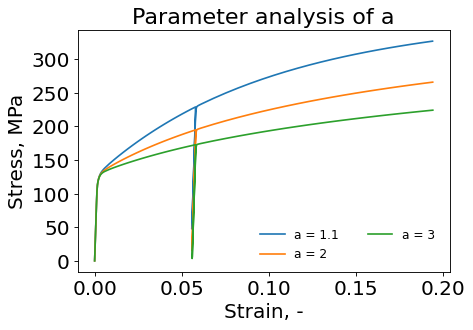

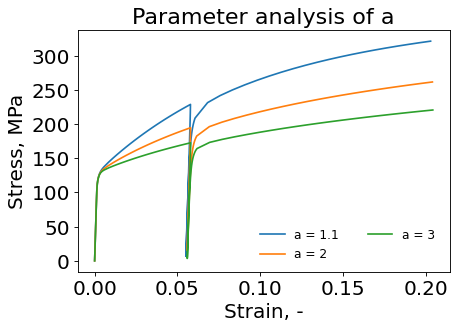

In [27]:
paramValues = ["1.1", "2", "3"]
paramName = "a"
paramNameLatex = "a"
paramUnit = ""
size = 18

############################### 
# v0
###############################
figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"notebooks/analysis_parameters/PH/UAT_RD/{paramName}/{paramValue}.txt"
    strainstress = preprocessDAMASKNonlinear(path)
    trueStrain = strainstress["strain"]
    trueStress = strainstress["stress"]
    plt.plot(trueStrain, trueStress, label = f"{paramNameLatex} = {paramValue} {paramUnit}")#), marker='.', markersize=5)

plt.title(f"Parameter analysis of {paramNameLatex}", size=size + 2)
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  
#plt.ylim([80, 310])
#plt.xlim([0, 0.2])
plt.xticks([0, 0.05, 0.1, 0.15, 0.2])

plt.ylabel('Stress, MPa', size=size)
plt.xlabel("Strain, -", size=size)
legend = plt.legend(loc=4, frameon=True, fontsize=size - 7, ncol=2, facecolor='white') #, shadow =True, framealpha=1)
# plt.grid()
legend.get_frame().set_linewidth(0.0)




figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"notebooks/analysis_parameters/PH/UAT_TD/{paramName}/{paramValue}.txt"
    strainstress = preprocessDAMASKNonlinear(path)
    trueStrain = strainstress["strain"]
    trueStress = strainstress["stress"]
    plt.plot(trueStrain, trueStress, label = f"{paramNameLatex} = {paramValue} {paramUnit}")#), marker='.', markersize=5)

plt.title(f"Parameter analysis of {paramNameLatex}", size=size + 2)
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  
#plt.ylim([80, 310])
#plt.xlim([0, 0.2])
plt.xticks([0, 0.05, 0.1, 0.15, 0.2])

plt.ylabel('Stress, MPa', size=size)
plt.xlabel("Strain, -", size=size)
legend = plt.legend(loc=4, frameon=True, fontsize=size - 7, ncol=2, facecolor='white') #, shadow =True, framealpha=1)
# plt.grid()
legend.get_frame().set_linewidth(0.0)


## Parameter analysis in the DB model

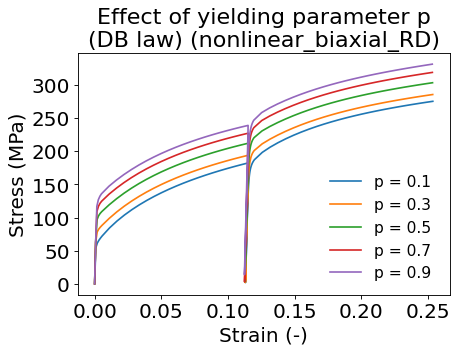

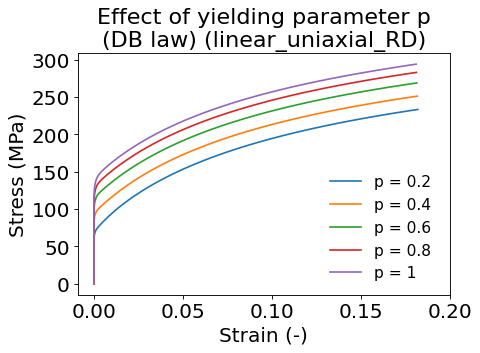

In [14]:
yieldingPoint = 0.004

paramValues = ["0.1", "0.3", "0.5", "0.7", "0.9"]
paramName = "p"
paramNameLatex = "p"
paramUnit = ""
size = 18

############################### 
# v0
###############################
figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"notebooks/analysis_parameters/DB/nonlinear_{paramName}/{paramValue}.txt"
    strainstress = preprocessDAMASKNonlinear(path)
    trueStrain = strainstress["strain"]
    trueStress = strainstress["stress"]
    trueStress *= 1e-6
    plt.plot(trueStrain, trueStress, label = f"{paramNameLatex} = {paramValue} {paramUnit}")#), marker='.', markersize=5)

plt.title(f"Effect of yielding parameter {paramNameLatex}\n(DB law) (nonlinear_biaxial_RD)", size=size + 2)
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  

plt.ylabel('Stress (MPa)', size=size)
plt.xlabel("Strain (-)", size=size)
legend = plt.legend(loc=4, frameon=True, fontsize=size - 4, ncol=1, facecolor='white') #, shadow =True, framealpha=1)
# plt.grid()
legend.get_frame().set_linewidth(0.0)

paramValues = ["0.2", "0.4", "0.6", "0.8", "1"]

figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"notebooks/analysis_parameters/DB/{paramName}/{paramValue}.txt"
    strainstress = preprocessDAMASKLinear(path)
    trueStrain = strainstress["strain"]
    trueStress = strainstress["stress"]
    trueStress *= 1e-6
    plt.plot(trueStrain, trueStress, label = f"{paramNameLatex} = {paramValue} {paramUnit}")#), marker='.', markersize=5)

plt.title(f"Effect of yielding parameter {paramNameLatex}\n(DB law) (linear_uniaxial_RD)", size=size + 2)
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  
plt.xticks([0, 0.05, 0.1, 0.15, 0.2])
plt.ylabel('Stress (MPa)', size=size)
plt.xlabel("Strain (-)", size=size)
legend = plt.legend(loc=4, frameon=True, fontsize=size - 4, ncol=1, facecolor='white') #, shadow =True, framealpha=1)
# plt.grid()
legend.get_frame().set_linewidth(0.0)

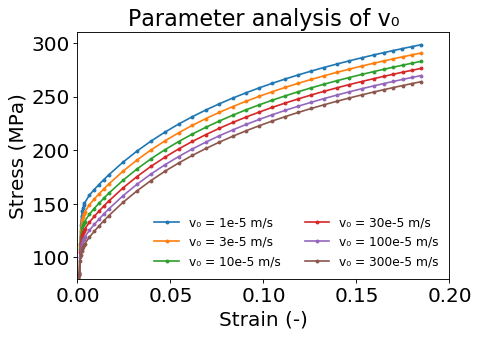

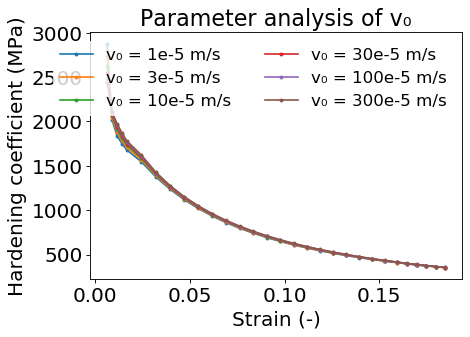

In [15]:
# paramValues_v0 = ["1e-5", "3e-5", "5e-5", "10e-5","15e-5"]
# paramValues_v0 = ["15e-5", "30e-5", "100e-5", "300e-5"]
paramValues = ["1e-5", "3e-5", "10e-5", "30e-5", "100e-5", "300e-5"]
# paramValues_v0 = ["1e-5"]
paramName = "v0"
paramNameLatex = "v₀"
paramUnit = "m/s"
size = 18

############################### 
# v0
###############################
figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"notebooks/analysis_parameters/DB/{paramName}/{paramValue}.txt"
    trueStrain, trueStress = preprocessDAMASKTrue(path)
    trueStress *= 1e-6

    plt.plot(trueStrain, trueStress, label = f"{paramNameLatex} = {paramValue} {paramUnit}", marker='.', markersize=5)

plt.title(f"Parameter analysis of {paramNameLatex}", size=size + 2)
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  
plt.ylim([80, 310])
plt.xlim([0, 0.2])

plt.ylabel('Stress (MPa)', size=size)
plt.xlabel("Strain (-)", size=size)
legend = plt.legend(loc=4, frameon=True, fontsize=size - 7, ncol=2, facecolor='white') #, shadow =True, framealpha=1)
# plt.grid()
legend.get_frame().set_linewidth(0.0)

figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"notebooks/analysis_parameters/DB/{paramName}/{paramValue}.txt"
    trueStrain, trueStress = preprocessDAMASKTrue(path)
    trueStress *= 1e-6
    beforeYieldingIndex = getIndexBeforeStrainLevel(trueStrain, yieldingPoint) 
    plasticStrain = trueStrain[beforeYieldingIndex:]
    plasticStress = trueStress[beforeYieldingIndex:]
    
    hardening_coefficient = np.diff(plasticStress)/np.diff(plasticStrain)
    plasticStrain = plasticStrain[1:]
    plt.plot(plasticStrain, hardening_coefficient, label = f"{paramNameLatex} = {paramValue} {paramUnit}", marker='.', markersize=5)

plt.title(f"Parameter analysis of {paramNameLatex}", size=size + 2)
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  

plt.ylabel('Hardening coefficient (MPa)', size=size)
plt.xlabel("Strain (-)", size=size)
legend = plt.legend(loc=1, frameon=True, fontsize=size - 3, ncol=2, facecolor='white') #, shadow =True, framealpha=1)
# plt.grid()
legend.get_frame().set_linewidth(0.0)


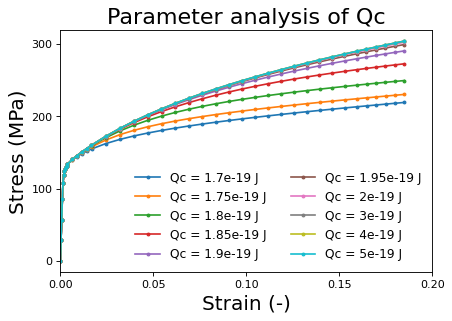

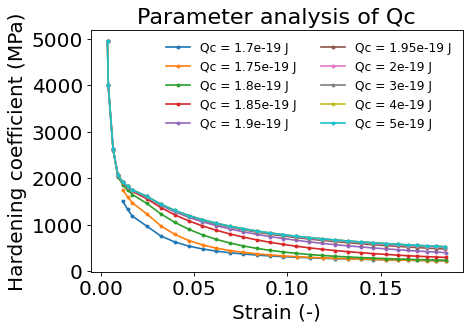

In [3]:
# paramValues_Qc = ["1.7e-19", "1.75e-19", "1.8e-19", "1.85e-19", "2e-19"]
# paramValues_Qc = ["2e-19", "3e-19", "4e-19", "5e-19"]
# paramValues_Qc = ["1.7e-19", "1.725e-19", "1.75e-19", "1.775e-19", "1.8e-19", "1.825e-19", "1.85e-19",  "1.875e-19", "1.9e-19", "1.925e-19", "1.95e-19", "1.975e-19", "2e-19", "3e-19", "4e-19", "5e-19"]
paramValues = ["1.7e-19", "1.75e-19", "1.8e-19", "1.85e-19", "1.9e-19", "1.95e-19", "2e-19", "3e-19", "4e-19", "5e-19"]
paramName = "Qc"
paramNameLatex = "Qc"
paramUnit = "J"
size = 18

# Adding 
############################### 
# Qc
###############################
figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"notebooks/analysis_parameters/DB/{paramName}/{paramValue}.txt"
    trueStrain, trueStress = preprocessDAMASKTrue(path)
    trueStress *= 1e-6

    plt.plot(trueStrain, trueStress, label = f"{paramNameLatex} = {paramValue} {paramUnit}", marker='.', markersize=5)

plt.title(f"Parameter analysis of {paramNameLatex}", size=size + 2)
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  
# plt.ylim([80, 310])
plt.xlim([0, 0.2])

plt.ylabel('Stress (MPa)', size=size)
plt.xlabel("Strain (-)", size=size)
legend = plt.legend(loc=4, frameon=True, fontsize=size - 7, ncol=2, facecolor='white') #, shadow =True, framealpha=1)
# plt.grid()
legend.get_frame().set_linewidth(0.0)

counter = 0
index = [12,12, 10, 10, 8, 8, 8, 8 , 8, 8]
figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"notebooks/analysis_parameters/DB/{paramName}/{paramValue}.txt"
    trueStrain, trueStress = preprocessDAMASKTrue(path)
    trueStress *= 1e-6
    #beforeYieldingIndex = getIndexBeforeStrainLevel(trueStrain, yieldingPoint) 
    plasticStrain = trueStrain[index[counter]:]
    plasticStress = trueStress[index[counter]:]
    counter += 1
    
    hardening_coefficient = np.diff(plasticStress)/np.diff(plasticStrain)
    plasticStrain = plasticStrain[1:]
    plt.plot(plasticStrain, hardening_coefficient, label = f"{paramNameLatex} = {paramValue} {paramUnit}", marker='.', markersize=5)

plt.title(f"Parameter analysis of {paramNameLatex}", size=size + 2)
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  

plt.ylabel('Hardening coefficient (MPa)', size=size)
plt.xlabel("Strain (-)", size=size)
legend = plt.legend(loc=1, frameon=True, fontsize=size - 7, ncol=2, facecolor='white') #, shadow =True, framealpha=1)
# plt.grid()
legend.get_frame().set_linewidth(0.0)

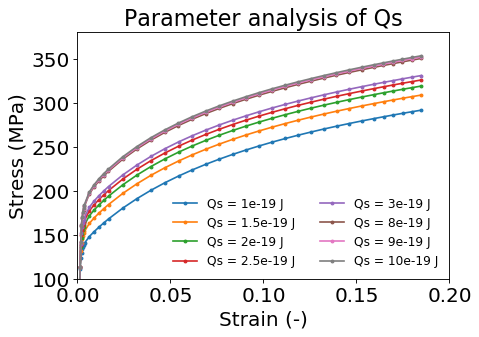

In [5]:
#paramValues_Qs = ["0.7e-19", "0.8e-19", "1e-19", "1.25e-19", "1.5e-19"]
#paramValues_Qs = ["1.5e-19", "2e-19", "3e-19", "4e-19", "5e-19", "10e-19"]
paramValues_Qs = ["1e-19", "1.5e-19", "2e-19", "2.5e-19", "3e-19", "8e-19", "9e-19", "10e-19"]
paramName= "Qs"
paramNameLatex = "Qs"
paramUnit = "J"
size = 18
# 1, 1.5, 2, 2.5, 3 # 8, 9, 10
# paramValues_Qs = ["0.7e-19", "0.8e-19", "0.9e-19", "1e-19", "2e-19", "3e-19", "8e-19", "9e-19", "10e-19"]
############################### 
# Qs
###############################
figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues_Qs: 
    path = f"notebooks/analysis_parameters/DB/{paramName}/{paramValue}.txt"
    trueStrain, trueStress = preprocessDAMASKTrue(path)
    trueStress *= 1e-6

    plt.plot(trueStrain, trueStress, label = f"{paramNameLatex} = {paramValue} {paramUnit}", marker='.', markersize=5)

plt.title(f"Parameter analysis of {paramNameLatex}", size=size + 2)
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  
plt.ylim([100, 380])
plt.xlim([0, 0.2])
plt.ylabel('Stress (MPa)', size=size)
plt.xlabel("Strain (-)", size=size)
plt.legend(loc=4, frameon=False, fontsize=size - 7, ncol=2)

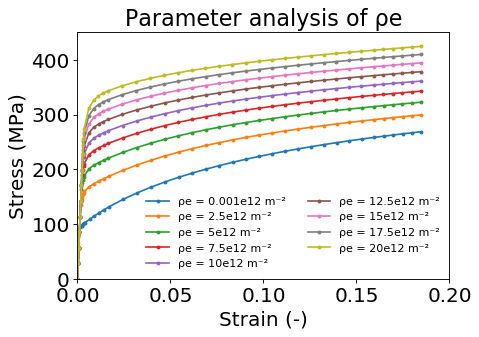

In [6]:
paramValues_rho_e = ["0.001e12", "2.5e12", "5e12", "7.5e12", "10e12", "12.5e12", "15e12", "17.5e12", "20e12"]
#paramValues_rho_e = ["0.1e12", "1e12", "2.5e12", "5e12", "7.5e12", "10e12", "12.5e12", "15e12", "17.5e12", "20e12"]
paramName = "rho_e"
paramNameLatex = "ρe"
paramUnit = "m⁻²"
size = 18

############################### 
# rho_e
###############################
figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues_rho_e: 
    path = f"notebooks/analysis_parameters/DB/{paramName}/{paramValue}.txt"
    trueStrain, trueStress = preprocessDAMASKTrue(path)
    trueStress *= 1e-6
    plt.plot(trueStrain, trueStress, label = f"{paramNameLatex} = {paramValue} {paramUnit}", marker='.', markersize=5)

plt.title(f"Parameter analysis of {paramNameLatex}", size=size + 2)
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  
plt.ylim([0, 450])
plt.xlim([0, 0.2])
plt.ylabel('Stress (MPa)', size=size)
plt.xlabel("Strain (-)", size=size)
plt.legend(loc=4, frameon=False, fontsize=size - 8, ncol =2)

In [ ]:
#paramValues_rho_d = ["1e-9", "2e-9", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "1e9", "2e9"]
paramValues_rho_d = ["7", "8", "9", "10"]
paramName = "rho_d"
paramNameLatex = "ρd"
paramUnit = "m⁻²"
size = 18

############################### 
# rho_d
###############################

figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues_rho_d: 
    path = f"notebooks/analysis_parameters/DB/{paramName}/{paramValue}.txt"
    trueStrain, trueStress = preprocessDAMASKTrue(path)
    trueStress *= 1e-6
    plt.plot(trueStrain, trueStress, label = f"{paramNameLatex} = {paramValue} {paramUnit}", marker='.', markersize=5)

plt.title(f"Parameter analysis of {paramNameLatex}", size=size + 2)
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  
plt.ylim([0, 300])
plt.xlim([0, 0.2])
plt.ylabel('Stress (MPa)', size=size)
plt.xlabel("Strain (-)", size=size)
plt.legend(loc=4, frameon=False, fontsize=size - 4, ncol =2)